<a href="https://colab.research.google.com/github/ryoiwata/neural_allstars/blob/main/all_stars/skyler/stringer_dataset_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does Pupil response predict face motion energy?

1. low dimensional rep of face motion data.
2. look at relation
3. ???
4. Profit

# Goal

Use an autoencoder to get a latent vector o each face and the plot these into a lower 2D embedding to observe if there are any clusters. What I WILL NEED HELP WITH ARE KEEPING THE INDEXES ALIGNED

In [1]:
# @title numpy, matplotlib, and data retrieval
import numpy as np
import matplotlib.pyplot as plt
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

(76800, 1000)


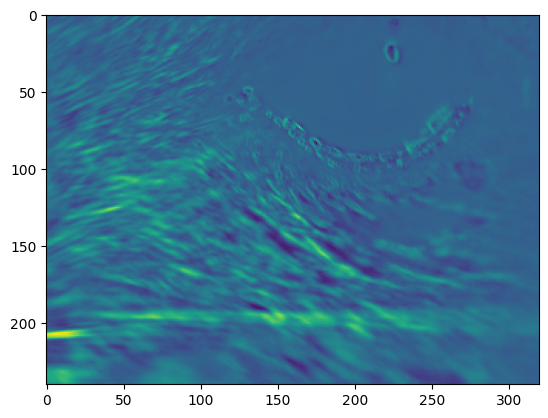

In [57]:
# @title Create a dataset and save it for easy io
dat = np.load("/content/stringer_spontaneous.npy", allow_pickle=True).item()
faces = np.loadtxt("face_reconstructions.csv", delimiter=',')

#check it loaded ok
print("should have loaded successfully")
print(faces.shape)
plt.imshow(faces[:,0].reshape(240,320))

In [60]:
# @title decrease dimensions for dataset
from sklearn.decomposition import PCA
X = PCA(n_components=.9).fit_transform(faces)

In [63]:
savepath = '/content/drive/MyDrive/NMA Project Shared/PCA_faces.csv'
if not os.path.isfile(savepath):
  np.savetxt("/content/drive/MyDrive/NMA Project Shared/PCA_faces.csv", X, delimiter=',')

In [65]:
# @title download and try umap
!pip install umap-learn --quiet
from scipy.stats import zscore
from umap import UMAP

ncomp = 3 # try 2, then try 3
xinit = 1 * zscore(X[:, :ncomp], axis=0)
embed = UMAP(n_components=ncomp, init=xinit, n_neighbors=20,
             metric='correlation', transform_seed=42).fit_transform(X) #Fit the PCAs

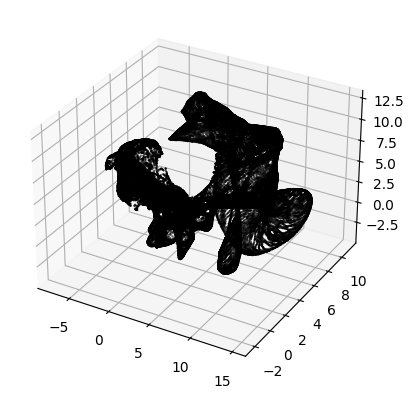

In [76]:
fig,ax = plt.subplots(1,1, subplot_kw={'projection': '3d'})
ax.scatter(embed[:,0], embed[:,1], embed[:,2], s=.2, c='k', alpha=0.8)

In [79]:
import plotly.express as px

fig = px.scatter_3d({"PC1":embed[:,0], "PC2":embed[:,1], "PC3":embed[:,2],},
                    x = "PC1", y = "PC2", z = "PC3",)
fig.update_traces(marker=dict(color="black",size=.2), opacity=0.8 )
fig.show()
#cluster by biggest connectivity of surface or manifold